In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
controller_output = Path('output')

In [3]:
low_df = pd.read_csv(controller_output / '1000_runs_lowest.csv')
high_df = pd.read_csv(controller_output / '1000_runs_highest.csv')
random_df = pd.read_csv(controller_output / '1000_runs_random.csv')

In [4]:
low_df

,run,fix_status,shop,component,adt,component_utility,uid,request,connectivity,replica,perf_max,importance,reliability,criticality,sat_point,state,sys_utility,rule_names,failure_name,rule_costs
0,1,before,mRUBiS #1,Availability Item Filter,1.076220,9668.946968,_b_K1WuSREeumKfox9_84gw,89.0,2.0,6.0,16.805051,12.0,0.5,24.0,0.056489,STARTED,2.095356e+06,NaN,NaN,NaN
1,1,before,mRUBiS #1,Bid and Buy Service,1.316753,12881.268890,_b_K1MuSREeumKfox9_84gw,360.0,7.0,14.0,17.056133,12.0,0.5,21.0,0.038633,STARTED,2.095356e+06,NaN,NaN,NaN
2,1,before,mRUBiS #1,Seller Reputation Item Filter,1.067252,8735.816557,_b_K1ZOSREeumKfox9_84gw,314.0,2.0,10.0,15.184877,12.0,0.5,24.0,0.031146,STARTED,2.095356e+06,NaN,NaN,NaN
3,1,before,mRUBiS #1,User Management Service,1.074025,3945.245093,_b_JnAOSREeumKfox9_84gw,108.0,8.0,6.0,6.593309,12.0,0.5,20.0,0.052246,STARTED,2.095356e+06,NaN,NaN,NaN
4,1,before,mRUBiS #1,Reputation Service,1.246731,0.000000,_b_K1PuSREeumKfox9_84gw,357.0,5.0,14.0,7.834721,12.0,0.5,13.0,0.037516,NOT_SUPPORTED,2.095356e+06,"[RestartComponent, HwRedeployComponent, Replac...",CF1,"[0.35, 1.6899999999999997, 1.6899999999999997,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,1000,after,mRUBiS #10,Inventory Service,1.240965,36407.314239,_P75NEO7wEeusWoXAZOWtdQ,400.0,3.0,41.0,11.117148,21.0,0.5,13.0,0.058054,STARTED,9.240056e+06,NaN,NaN,NaN
359996,1000,after,mRUBiS #10,Region Item Filter,1.294757,55981.451375,_Oxw8TO7wEeusWoXAZOWtdQ,101.0,2.0,39.0,18.388965,21.0,0.5,29.0,0.058516,STARTED,9.240056e+06,NaN,NaN,NaN
359997,1000,after,mRUBiS #10,Category Item Filter,1.066150,31810.889442,_P5G-0O7wEeusWoXAZOWtdQ,129.0,2.0,22.0,16.836799,21.0,0.5,15.0,0.033603,STARTED,9.240056e+06,NaN,NaN,NaN
359998,1000,after,mRUBiS #10,Last Second Sales Item Filter,1.369359,40202.089682,_QIeQgO7wEeusWoXAZOWtdQ,401.0,2.0,32.0,19.541519,21.0,0.5,14.0,0.054530,STARTED,9.240056e+06,NaN,NaN,NaN


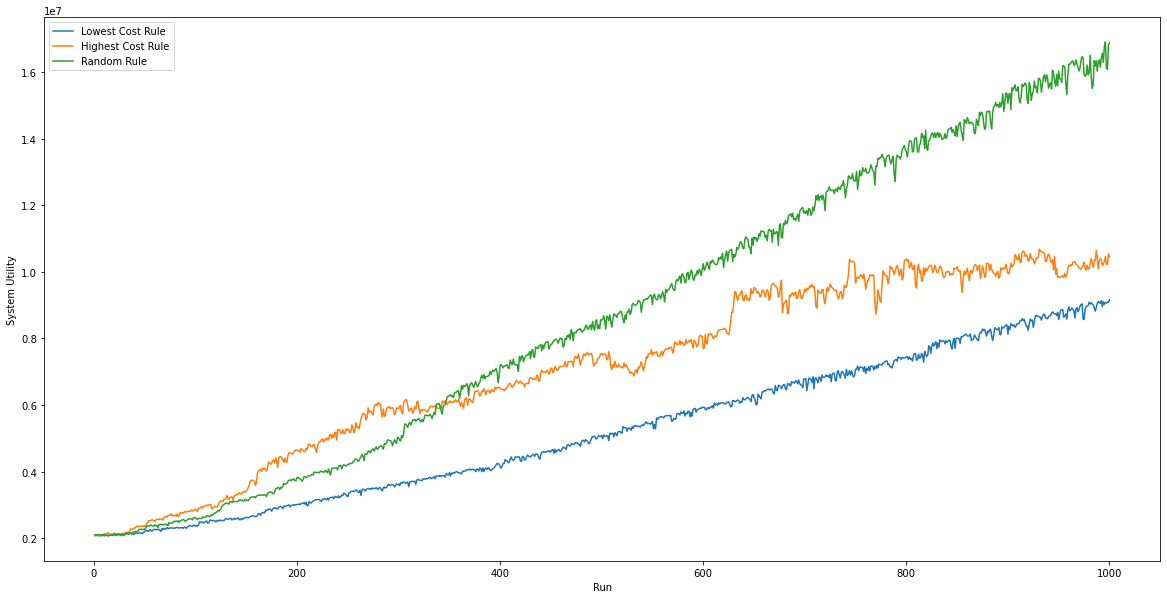

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='run', y='sys_utility', data=low_df, ax=ax, ci=None, label='Lowest Cost Rule')
sns.lineplot(x='run', y='sys_utility', data=high_df, ax=ax, ci=None, label='Highest Cost Rule')
sns.lineplot(x='run', y='sys_utility', data=random_df, ax=ax, ci=None, label='Random Rule')
ax.set(xlabel='Run', ylabel='System Utility');

In [6]:
for df in [low_df, high_df, random_df]:
    df['shop_utility'] = df.groupby(['run', 'fix_status', 'shop'])['component_utility'].agg('sum').reset_index()['component_utility']

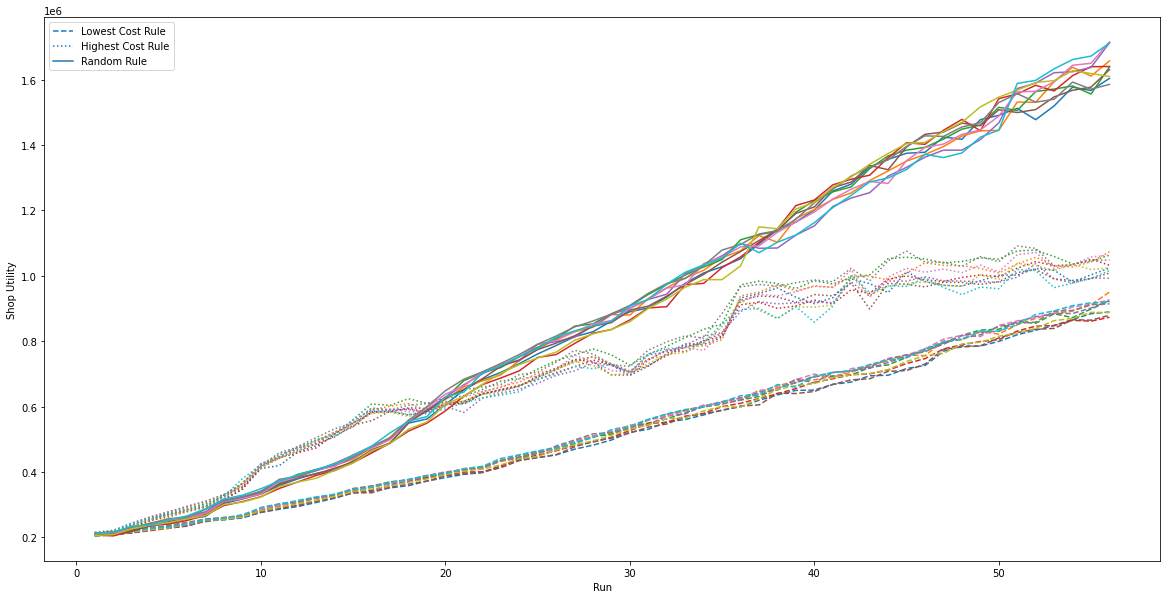

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
lowest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=low_df, ci=None, linestyle='dashed', ax=ax, label='Lowest Cost Rule', legend=False)
highest = sns.lineplot(x='run', y='shop_utility', hue='shop', data=high_df, ci=None, linestyle='dotted', ax=ax, label='Highest Cost Rule', legend=False)
random = sns.lineplot(x='run', y='shop_utility', hue='shop', data=random_df, ci=None, ax=ax, label='Random Rule', legend=False)
ax.set(xlabel='Run', ylabel='Shop Utility');
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::10], ['Lowest Cost Rule', 'Highest Cost Rule', 'Random Rule']);